### Cluster genes based on their expression patterns across samples. Visualize the representative expression profile for each identified cluster. Do the inverse, i.e., cluster samples based and plot gene signatures.

C:\Users\Sudeep\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Sudeep\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Index(['G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G12',
       ...
       'G9759', 'G9760', 'G9761', 'G9762', 'G9763', 'G9764', 'G9765', 'G9766',
       'G9767', 'G9768'],
      dtype='object', name='Gene', length=9550)
Index(['G76', 'G864', 'G3134', 'G4154', 'G6256', 'G6613'], dtype='object', name='Gene')
Index(['G865', 'G1125', 'G8785'], dtype='object', name='Gene')
Index(['G1', 'G11', 'G38', 'G60', 'G65', 'G129', 'G231', 'G238', 'G246',
       'G278',
       ...
       'G9624', 'G9634', 'G9638', 'G9653', 'G9666', 'G9693', 'G9714', 'G9722',
       'G9734', 'G9735'],
      dtype='object', name='Gene', length=209)


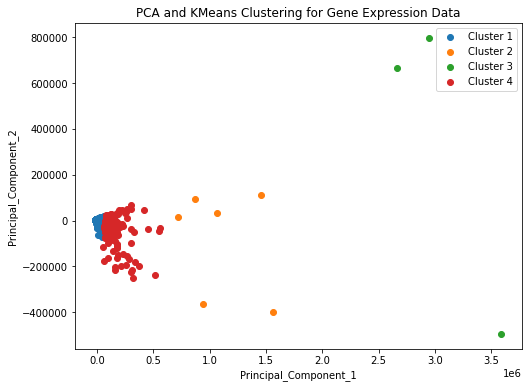

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Read the gene expression data from T2.txt file
data = pd.read_csv("T2.txt", sep="\t", index_col=0)

# Number of clusters
num_clusters = 4

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# Apply KMeans clustering on PCA-transformed data
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)

# Visualize the PCA-transformed data and cluster assignments
plt.figure(figsize=(8, 6))
for cluster_num in range(num_clusters):
    cluster_genes = data.index[cluster_labels == cluster_num]
    print(cluster_genes)
    plt.scatter(pca_result[cluster_labels == cluster_num, 0],
                pca_result[cluster_labels == cluster_num, 1],
                label=f'Cluster {cluster_num + 1}')

plt.xlabel('Principal_Component_1')
plt.ylabel('Principal_Component_2')
plt.title('PCA and KMeans Clustering for Gene Expression Data')
plt.legend()
plt.show()


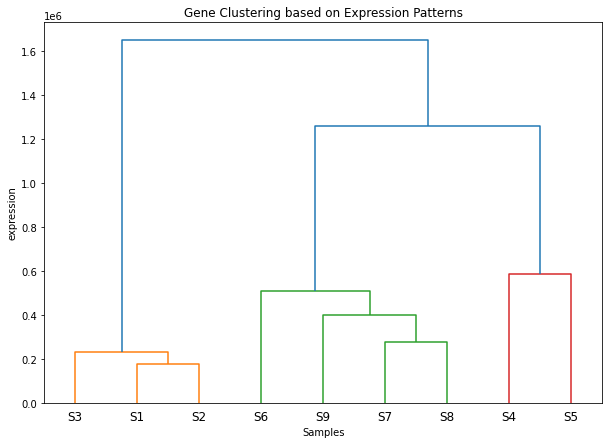

In [2]:
import pandas as pd
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

data = pd.read_csv("T2.txt", sep="\t", index_col=0) # Assuming the first column contains gene names

arr = data.to_numpy()
#print('\nNumpy Array\n----------\n', arr)

# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(data.T, method='average')  # Transpose the DataFrame

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=data.columns)
plt.title('Gene Clustering based on Expression Patterns')
plt.xlabel('Samples')
plt.ylabel('expression')
plt.show()


### Attached are two matrices T3_M1.txt and T3_M2.txt. Can you think of any statistical test to test for differences/similarity between any two matrices by preserving the matrix structure?

In [3]:
import numpy as np
from scipy.stats import ks_2samp

# Load your matrices (m1 and m2) as NumPy arrays
m1 = np.loadtxt('T3_M1.txt')
m2 = np.loadtxt('T3_M2.txt')
# Perform K-S Test between two matrices
ks_statistic, p_value = ks_2samp(m1.flatten(), m2.flatten())

# Output the test statistic and p-value
print("K-S Statistic:", ks_statistic)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis i.e. The two matrices have different distributions.")
else:
    print("Fail to reject the null hypothesis i.e The two matrices have similar distributions.")


K-S Statistic: 0.15
P-Value: 0.9831368772656193
Fail to reject the null hypothesis i.e The two matrices have similar distributions.


In [4]:
import numpy as np
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.stats import pearsonr

# Load your matrices
m1 = np.loadtxt('T3_M1.txt')
m2 = np.loadtxt('T3_M2.txt')

# Calculate pairwise Euclidean distances for the matrices
distances_m1 = squareform(pdist(m1))
distances_m2 = squareform(pdist(m2))

# Perform the Mantel test
mantel_corr, mantel_p_value = pearsonr(distances_m1.flatten(), distances_m2.flatten())

# Output the Mantel correlation and p-value
print(f"Mantel Correlation: {mantel_corr}")
print(f"P-value: {mantel_p_value}")

# Interpret the results
if mantel_p_value < 0.05:
    print("There is a significant correlation between the matrices, i.e similarities.")
else:
    print("There is no significant correlation between the matrices, i.e dissimilarities.")


Mantel Correlation: 0.794607892458052
P-value: 0.00023556229373980256
There is a significant correlation between the matrices, i.e similarities.
